# Description
The purpose of this notebook is to do prospection on data obtained from scriping interests links and Zefix results.

Indeed, on issue that may arise is that the data aren't clean enough to find usable results. In other words, we can have this two type of errors:

- False positive: for example, we search for a company linked with a politician, and we obtain on a lot of different companies
- False negatives: data isn't clean and thus can't find the real company in Zefix

This notebook is trying to have an insight on this two issues.

# Set-up

In [72]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from zefix_scraper import zefix_search_raw

In [73]:
def count_findings(name):
    """
    Count how many findings zefix has done.
    """
    page = zefix_search_raw(name)
    
    if page is None:
        return 0

    content = BeautifulSoup(page, 'lxml')
    
    return len(content.body.find_all('p')) -1


In [74]:
interests = pd.read_json('data/all_interests.json')
interests

,data_source,first_name,index,interest_name,last_name,position
0,federal_parliament,Christoph,68,Kraftwerk Birsfelden AG,Eymann,Membre
1,federal_parliament,Christoph,68,Universität Basel (Universitätsrat),Eymann,Membre
10,federal_parliament,Ulrich,85,Online Easy AG,Giezendanner,Vice-président(e)
100,federal_parliament,Kathy,439,Organe consultatif sur les changements climati...,Riklin,Président(e)
1000,federal_parliament,Albert,3372,IG Volkskultur Schweiz und Fürstentum Liechten...,Vitali,Président(e)
1001,federal_parliament,Albert,3372,Pro Senectute Kanton Luzern (Stiftungsversamml...,Vitali,Membre
1002,federal_parliament,Albert,3372,Energie Oberkirch AG,Vitali,Président(e)
1003,federal_parliament,Albert,3372,Schweizer Verband für Rechnungslegung,Vitali,Membre
1004,federal_parliament,Albert,3372,Wohnen Schweiz,Vitali,Membre
1005,federal_parliament,Albert,3372,Förderverein Luzern Volksschulen,Vitali,Membre


# Naive lookup

In [75]:
import concurrent.futures

all_interests = interests.interest_name.unique()
all_interests = map(lambda x: x.strip(), all_interests)

all_interest_count = {}

with concurrent.futures.ThreadPoolExecutor() as executor:
    futures_data = {executor.submit(count_findings, interest): interest for interest in all_interests}
    
    for future in concurrent.futures.as_completed(futures_data):
        interest = futures_data[future]
        try:
            count = future.result()
        except Exception as e:
            print("{} generated exception: {}".format(interest, e))
        else: 
            all_interest_count[interest] = count
            
all_interest_count

{'Retraites populaires': 0,
 'zubischuhe.ch AG': 1,
 'Parking de Plainpalais SA': 0,
 'Schweizerischer Ingenieur- und Architektenverein (SIA)': 1,
 'KuRo Consulting AG': 1,
 "Coopérative d'habitation Equilibre": 0,
 'Orto': 0,
 'Aeschi & Company GmbH': 0,
 'Verband der Schweizerischen Privatschulen (VSP)': 0,
 'P. Reichenstein AG': 0,
 'Association pour une Suisse indépendante et neutre (ASIN)': 0,
 'Nouveau Mouvement Européen Suisse (NOMES) Neuchâtel': 0,
 'Schweizer Zucker AG': 1,
 'Swisscofel - Association suisse du Commerce Fruits': 0,
 'Economiesuisse': 2,
 'BIORIGIN SA, c/o André Haldemann, Meyrin': 0,
 'Lions Suisse Multidistrict 102': 0,
 'Fête Fédérale de Musique 2016 Montreux-Riviera': 0,
 "Fondation Jean Monnet pour l'Europe": 1,
 'Schulheim Schloss Erlach': 0,
 'Association Le Jardin d’Hedwig': 0,
 'Association Suisse-Turquie': 0,
 'HWZ Hochschule für Wirtschaft Zürich AG': 0,
 'AFU Anlagen und Finanz AG': 1,
 'Aqua-Terra Holding AG': 1,
 'Swiss Cardio Technologies AG': 1,


In [80]:
found_interests = pd.Series(all_interest_count)
found_interests.describe()

count    2601.000000
mean        1.168397
std        30.113019
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1500.000000
dtype: float64

In [81]:
found_interests.sort_values(ascending=False)

AGE SA                                                                          1500
Kies AG                                                                          194
Pris AG                                                                          184
Gewa                                                                             115
Eco Swiss                                                                        103
Partner Immobilien AG                                                             79
Kaiser AG                                                                         60
ASTAG                                                                             37
Kaeser                                                                            37
Edy Toscano AG                                                                    18
Entwicklung Schweiz                                                               15
Lions Club                                                       

For the sake of this analysis, AGE SA is dropped (a manual lookup might be a better solution finally)

In [88]:
try:
    found_interests.drop('AGE SA', inplace=True)
except ValueError:
    pass

In [90]:
valid_ratio = (found_interests == 1).mean()
print("Valid interests (thus when having exactly one finding): {:0.1f}%".format(valid_ratio * 100))

Valid interests (thus when having exactly one finding): 11.5%


In [91]:
null_ratio = (found_interests == 0).mean()
print("No finding: {:0.1f}%".format(null_ratio * 100))

No finding: 84.4%


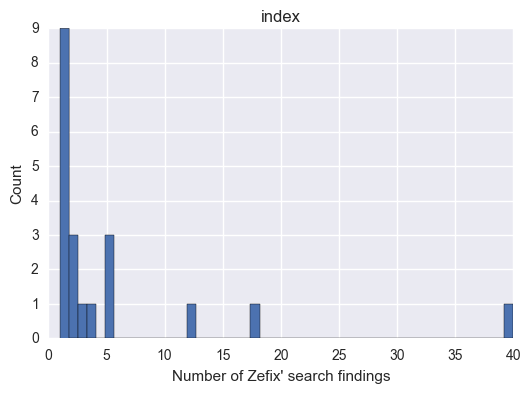

In [131]:
df = pd.DataFrame(found_interests, columns=['findings_count']).reset_index()
more_one_finding = df[df.findings_count > 1]
more_one_finding.groupby('findings_count').count().hist(bins=50)
plt.xlabel("Number of Zefix' search findings")
plt.ylabel("Count")

In [130]:
more_one_finding.groupby('findings_count').count()

,index
findings_count,
2,40
3,18
4,12
5,5
6,5
7,4
8,5
9,2
12,3


In [78]:
#df.reset_index()
df['length'] = df.index.map(len)
df

,findings_count,length
"""Ron"" Anlage-Aktiengesellschaft",1,31
022 Télégenève SA,0,17
3 B Holding,0,11
95C,0,3
A Planer AG,0,11
ACQUAROSSA TERME SA,1,19
ADEV Energiegenossenschaft,0,26
AEBI Reisen GmbH,0,16
AECA Bundesgasse 20 Bern,0,24
AEE Suisse,0,10


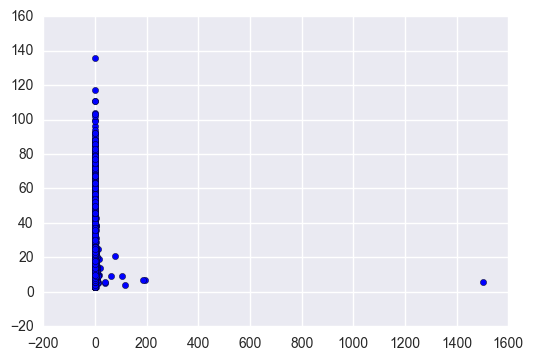